In [ ]:
# 일단 하나만 보기 

import pandas as pd
import os

# 데이터가 들어있는 경로
file_path = "../data/raw/features_1.csv" # 파일명이 features_1.csv 가 맞는지 확인해줘!

# 데이터 읽기
df = pd.read_csv(file_path)

# 1. 어떤 컬럼(열)들이 있는지 확인
print("--- 컬럼 이름들 ---")
print(df.columns.tolist())

# 2. 데이터가 어떻게 생겼는지 5줄만 보기
print("\n--- 데이터 샘플 ---")
display(df.head())

--- 컬럼 이름들 ---
['Image', 'Object ID', 'Object type', 'Name', 'Classification', 'Parent', 'ROI', 'Centroid X µm', 'Centroid Y µm', 'Area µm^2', 'Length µm', 'Circularity', 'Solidity', 'Max diameter µm', 'Min diameter µm', 'Hematoxylin: Mean', 'Hematoxylin: Median', 'Hematoxylin: Min', 'Hematoxylin: Max', 'Hematoxylin: Std.Dev.', 'DAB: Mean', 'DAB: Median', 'DAB: Min', 'DAB: Max', 'DAB: Std.Dev.', 'AR (calc Max/Min)', 'Eccentricity (Feret-approx)', 'Perimeter µm']

--- 데이터 샘플 ---


,Image,Object ID,Object type,Name,Classification,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,...,Hematoxylin: Max,Hematoxylin: Std.Dev.,DAB: Mean,DAB: Median,DAB: Min,DAB: Max,DAB: Std.Dev.,AR (calc Max/Min),Eccentricity (Feret-approx),Perimeter µm
0,Tibia_1_131363-1_Masson.svs,9fc412e7-91d6-4f5f-8348-78f3bf35cffd,Annotation,SAM (Quality=0.971),Growth Plate,Root object (Image),Polygon,2135.2,3042.1,692969.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4538.70
1,Tibia_1_131363-1_Masson.svs,ef002c03-38a0-4e7a-b483-b9c568bafd29,Annotation,NaN,Hypertrophic,SAM (Quality=0.971),Polygon,2338.6,2863.7,789.13,...,0.9639,0.1021,0.0139,0.0139,-0.1173,0.3426,0.0345,1.4808,0.7375,124.77
2,Tibia_1_131363-1_Masson.svs,bc9105e1-83e2-44f6-ba8f-c2bae3845d46,Annotation,NaN,Hypertrophic,SAM (Quality=0.971),Polygon,2307.3,2458.8,783.37,...,0.6876,0.0979,0.0092,0.0106,-0.1095,0.1912,0.0262,1.2676,0.6146,129.69
3,Tibia_1_131363-1_Masson.svs,eeed2f29-b7b4-44ba-9721-46da2d6c6fe6,Annotation,NaN,Hypertrophic,SAM (Quality=0.971),Polygon,2313.2,2992.0,778.01,...,0.6404,0.0876,0.0088,0.0084,-0.1020,0.1599,0.0269,1.4692,0.7326,130.51
4,Tibia_1_131363-1_Masson.svs,711ad9e4-d11d-4a12-b7c3-ccba43706a75,Annotation,NaN,Hypertrophic,SAM (Quality=0.971),Polygon,2323.9,2538.3,755.39,...,0.5765,0.0927,0.0140,0.0148,-0.0998,0.1676,0.0288,1.5919,0.7781,123.17


In [2]:
# 전체 파일 (1~9) 다 보기

import glob

# 1. raw 폴더 안의 모든 csv 파일 경로 가져오기
all_files = glob.glob("../data/raw/*.csv")
print(f"발견된 파일들: {all_files}")

# 2. 모든 파일을 읽어서 리스트에 담기
li = []
for filename in all_files:
    temp_df = pd.read_csv(filename)
    temp_df['Source_File'] = os.path.basename(filename) # 어느 파일 출신인지 기록하는 센스!
    li.append(temp_df)

# 3. 하나로 합치기 (Concat)
df = pd.concat(li, axis=0, ignore_index=True)

print(f"전체 데이터 개수: {len(df)}개")
print(f"전체 컬럼 개수: {len(df.columns)}개")

# 4. 가장 중요한 '정답'의 분포 확인하기
print("\n--- [Classification 분포] ---")
print(df['Classification'].value_counts())
print("\n--- [비율 %] ---")
print(df['Classification'].value_counts(normalize=True) * 100)

발견된 파일들: ['../data/raw\\features_1.csv', '../data/raw\\features_2.csv', '../data/raw\\features_3.csv', '../data/raw\\features_4.csv', '../data/raw\\features_5.csv', '../data/raw\\features_6.csv', '../data/raw\\features_7.csv', '../data/raw\\features_8.csv', '../data/raw\\features_9.csv']
전체 데이터 개수: 23792개
전체 컬럼 개수: 30개

--- [Classification 분포] ---
Classification
Proliferative     14467
Hypertrophic       5202
Undetermined_2     1889
Undetermined_1     1889
Resting             251
resting_temp         53
Uncertain            32
Growth Plate          9
Name: count, dtype: int64

--- [비율 %] ---
Classification
Proliferative     60.806153
Hypertrophic      21.864492
Undetermined_2     7.939644
Undetermined_1     7.939644
Resting            1.054976
resting_temp       0.222764
Uncertain          0.134499
Growth Plate       0.037828
Name: proportion, dtype: float64


In [3]:
# 클래스 정제

# 1. 유지할 5개 클래스 정의
target_classes = [
    'Hypertrophic', 
    'Undetermined_1', 
    'Proliferative', 
    'Undetermined_2', 
    'Resting'
]

# 2. 필터링: 정의된 클래스만 남기기
df_final = df[df['Classification'].isin(target_classes)].copy()

# 3. 데이터 무결성 확인 (NaN 체크)
print("--- [데이터 정제 결과] ---")
print(f"남은 데이터 개수: {len(df_final)}개")
print(f"제거된 노이즈 개수: {len(df) - len(df_final)}개")

print("\n--- [최종 클래스별 샘플 수] ---")
print(df_final['Classification'].value_counts())

# 4. 결측치(NaN) 최종 확인
nan_check = df_final.isnull().sum()
if nan_check.sum() > 0:
    print("\n⚠️ 결측치가 발견된 컬럼:")
    print(nan_check[nan_check > 0])
else:
    print("\n✅ 결측치 없음: 깨끗한 데이터입니다.")

--- [데이터 정제 결과] ---
남은 데이터 개수: 23698개
제거된 노이즈 개수: 94개

--- [최종 클래스별 샘플 수] ---
Classification
Proliferative     14467
Hypertrophic       5202
Undetermined_2     1889
Undetermined_1     1889
Resting             251
Name: count, dtype: int64

⚠️ 결측치가 발견된 컬럼:
Name                           23698
Length µm                         47
Circularity                       54
Solidity                          47
Max diameter µm                   47
Min diameter µm                   47
Hematoxylin: Mean                773
Hematoxylin: Median              773
Hematoxylin: Min                 773
Hematoxylin: Max                 773
Hematoxylin: Std.Dev.            773
DAB: Mean                        773
DAB: Median                      773
DAB: Min                         773
DAB: Max                         773
DAB: Std.Dev.                    773
AR (calc Max/Min)                 47
Eccentricity (Feret-approx)       47
Perimeter µm                      10
Column ID                      21381
dtyp

In [4]:
# 무의미한 칼럼 삭제

cols_to_drop = ['Name', 'Column ID']
df_filtered = df_final.drop(columns=[c for c in cols_to_drop if c in df_final.columns])

In [5]:
# 결측치(NaN)가 하나라도 있는 행(Row)은 모두 삭제

df_pure = df_filtered.dropna()

In [6]:
# 중간 결과

print("--- [정화 작업 결과] ---")
print(f"원본 데이터 행: {len(df_final)}")
print(f"정화 후 데이터 행: {len(df_pure)}")
print(f"삭제된 행 개수: {len(df_final) - len(df_pure)} ({((len(df_final)-len(df_pure))/len(df_final)*100):.2f}%)")

--- [정화 작업 결과] ---
원본 데이터 행: 23698
정화 후 데이터 행: 22925
삭제된 행 개수: 773 (3.26%)


In [7]:
# 클래스별 분포 재확인

print("\n--- [최종 클래스별 분포] ---")
new_dist = df_pure['Classification'].value_counts()
new_pct = df_pure['Classification'].value_counts(normalize=True) * 100

dist_comparison = pd.DataFrame({
    'Count': new_dist,
    'Percentage (%)': new_pct
})
print(dist_comparison)


--- [최종 클래스별 분포] ---
                Count  Percentage (%)
Classification                       
Proliferative   13993       61.038168
Hypertrophic     5083       22.172301
Undetermined_1   1843        8.039258
Undetermined_2   1792        7.816794
Resting           214        0.933479


In [12]:
# 컬럼명과 타입을 데이터프레임 형태로 예쁘게 보기
dtype_df = pd.DataFrame(df_pure.dtypes, columns=['Data Type'])
dtype_df['Non-Null Count'] = df_pure.notnull().sum()
display(dtype_df)

,Data Type,Non-Null Count
Image,object,22925
Object ID,object,22925
Object type,object,22925
Classification,object,22925
Parent,object,22925
ROI,object,22925
Centroid X µm,float64,22925
Centroid Y µm,float64,22925
Area µm^2,float64,22925
Length µm,float64,22925


In [11]:
# 컬럼별 데이터 타입과 Non-Null 개수 재확인
print("--- [데이터 타입 및 정보] ---")
print(df_pure.info(verbose=True, show_counts=True))

# 수치형 데이터의 기술 통계 (값의 범위 확인)
print("\n--- [수치형 데이터 기술 통계] ---")
# 수치 데이터들이 0~1 사이인지, 아니면 0~1000 사이인지 확인하는 게 목적이야.
display(df_pure.describe().T) 

# 범주형(Object) 데이터 확인
print("\n--- [범주형 데이터 요약] ---")
display(df_pure.describe(include=['object']).T)

--- [데이터 타입 및 정보] ---
<class 'pandas.core.frame.DataFrame'>
Index: 22925 entries, 1 to 23791
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image                        22925 non-null  object 
 1   Object ID                    22925 non-null  object 
 2   Object type                  22925 non-null  object 
 3   Classification               22925 non-null  object 
 4   Parent                       22925 non-null  object 
 5   ROI                          22925 non-null  object 
 6   Centroid X µm                22925 non-null  float64
 7   Centroid Y µm                22925 non-null  float64
 8   Area µm^2                    22925 non-null  float64
 9   Length µm                    22925 non-null  float64
 10  Circularity                  22925 non-null  float64
 11  Solidity                     22925 non-null  float64
 12  Max diameter µm              22925 non-null  float64
 13 

,count,mean,std,min,25%,50%,75%,max
Centroid X µm,22925.0,2349.724209,430.634367,1686.4000,2045.4000,2210.2000,2573.1000,3676.9000
Centroid Y µm,22925.0,2649.768270,563.245315,1301.0000,2276.6000,2642.7000,2999.6000,4003.3000
Area µm^2,22925.0,130.083996,131.118691,0.2511,55.6200,80.3800,138.5000,1359.4000
Length µm,22925.0,52.057330,21.886844,2.0044,37.6002,46.3573,59.6842,174.5544
Circularity,22925.0,0.510628,0.100991,0.1624,0.4386,0.5170,0.5869,0.8233
Solidity,22925.0,0.908993,0.041561,0.5834,0.8897,0.9183,0.9383,1.0000
Max diameter µm,22925.0,18.270259,7.076722,0.7087,13.4623,16.8077,21.4812,65.6615
Min diameter µm,22925.0,8.781246,5.066209,0.5010,5.4998,6.9126,10.1988,39.5012
Hematoxylin: Mean,22925.0,0.351618,0.099731,0.0834,0.2805,0.3591,0.4229,0.7259
Hematoxylin: Median,22925.0,0.333545,0.106297,0.0650,0.2564,0.3378,0.4096,0.7212



--- [범주형 데이터 요약] ---


,count,unique,top,freq
Image,22925,9,Tibia_3_131363-3_Masson.svs,3208
Object ID,22925,22925,92c4c6dc-0af0-4c56-bbd9-c9f62af48ef2,1
Object type,22925,1,Annotation,22925
Classification,22925,5,Proliferative,13993
Parent,22925,4,Annotation (Growth Plate),14673
ROI,22925,2,Polygon,22922
Source_File,22925,9,features_3.csv,3208


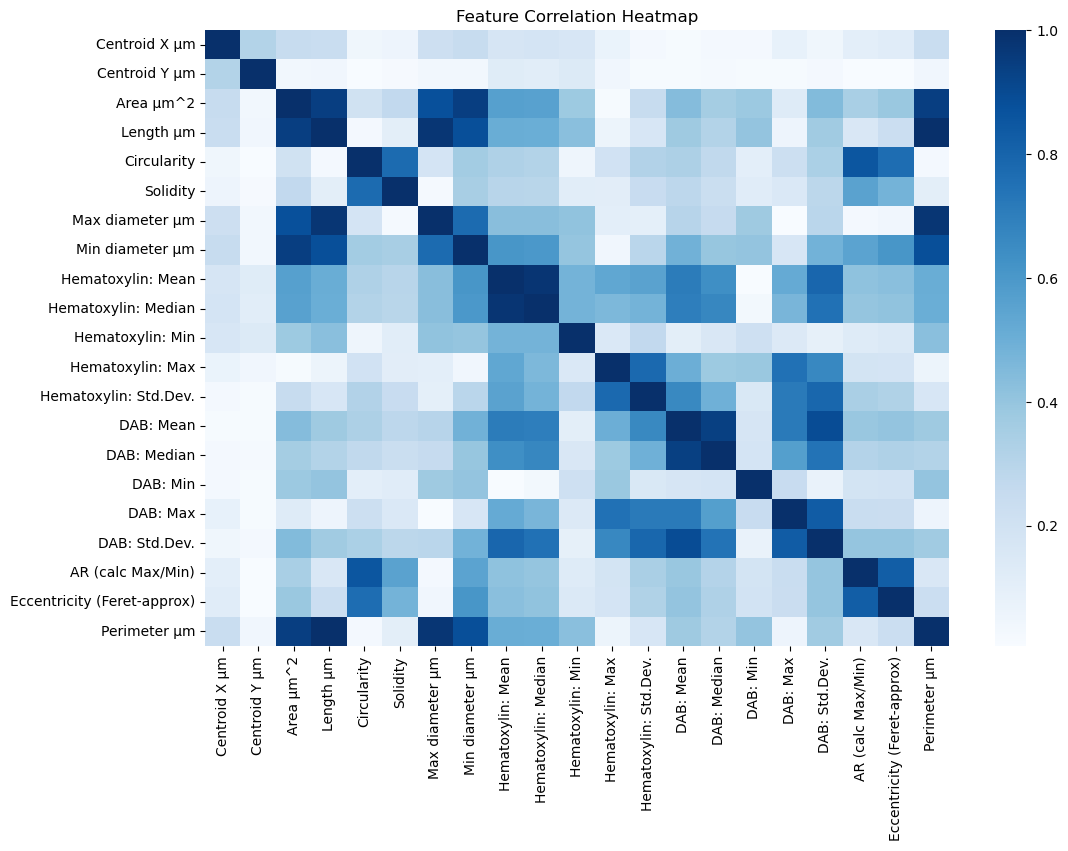

🚩 너무 비슷해서 하나만 써도 될 것 같은 피처들 (3개):
['Max diameter µm', 'Hematoxylin: Median', 'Perimeter µm']


In [8]:
# 피처 간의 상관관계 확인

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 수치형 데이터만 추출 (Classification 제외)
numeric_df = df_pure.select_dtypes(include=[np.number])

# 2. 상관관계 계산
corr = numeric_df.corr().abs()

# 3. 시각화 (Heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. 상관관계가 0.95 이상인 '쌍둥이' 피처들 찾아내기
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"🚩 너무 비슷해서 하나만 써도 될 것 같은 피처들 ({len(to_drop)}개):")
print(to_drop)